In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load original data into dataframe and check shape
df_ori = pd.read_csv('diabetic_data.csv')
#print(df_ori.shape)
df = df_ori.copy(deep=True)

for x in df.columns:
    print(x, df[x].unique())

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedic

max_glu_serum ['None' '>300' 'Norm' '>200']
A1Cresult ['None' '>7' '>8' 'Norm']
metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']
change ['No' 'Ch']
diabetesMed ['No' 'Yes']
readmitted ['NO' '>30' '<30']


In [3]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1) #should we code it into 1 and 2?
df['readmitted'] = df['readmitted'].replace('NO', 0)
df.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [4]:
df.drop(columns = ['patient_nbr','citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)
#df.drop(columns = ['citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)

#df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
drop_Idx = set()
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3']=='?'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,0


In [5]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)', 15)
df['age'] = df['age'].replace('[20-30)', 25)
df['age'] = df['age'].replace('[30-40)', 35)
df['age'] = df['age'].replace('[40-50)', 45)
df['age'] = df['age'].replace('[50-60)', 55)
df['age'] = df['age'].replace('[60-70)', 65)
df['age'] = df['age'].replace('[70-80)', 75)
df['age'] = df['age'].replace('[80-90)', 85)
df['age'] = df['age'].replace('[90-100)', 95)

df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('Other', 4)

df = df.replace('?', -1)
#df.head()

for col in df:
    print(col, " : ")
    print(df[col].unique())
    

race  : 
[ 0  1 -1  4  3  2]
gender  : 
[0 1]
age  : 
[15 25 35 45 55 65 75 85 95  5]
admission_type_id  : 
[1 2 3 6 4 5 8 7]
discharge_disposition_id  : 
[ 1  3  6  2  5  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28 19
 27]
admission_source_id  : 
[ 7  2  4  1  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital  : 
[ 3  2  1  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures  : 
[ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  66  36  19  64  25  53  52  87  27  37  41  28  48  10   2  65  67
  40  54  58  57  43  32  83  34  39  69  38  72  22  96  46  78  56  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102   7  89  91  92   4 101  99 100 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures  : 
[0 5 1 6 2 3 4]
num_medications  : 
[18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25  4 

In [6]:
# df.loc[(df.diag_1.str.contains('V')),'diag_1']=0
# df.loc[(df.diag_1.str.contains('E')),'diag_1']=0

# df.loc[(df.diag_2.str.contains('V')),'diag_2']=0
# df.loc[(df.diag_2.str.contains('E')),'diag_2']=0

# df.loc[(df.diag_3.str.contains('V')),'diag_3']=0
# df.loc[(df.diag_3.str.contains('E')),'diag_3']=0

# for i in df['diag_1']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_2']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_3']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))

diags = ['diag_1','diag_2','diag_3']
    
def detection(value):
    if value[0]== "V" or value[0] == 'E':
        value = '0'
        return value # from new york united healthcare
    else:
        return value
    
for f in diags:
    for i in df[f].index:
        df[f].at[i] = detection(df[f].at[i])
        
for i in df['diag_1']:
    b = 'V' in str(i)
    c = 'E' in str(i)
    if b or c:
        print(str(i))
        
#print(df['diag_1'].unique())
        
#print(df['diag_2'].unique())
        
#print(df['diag_3'].unique())


    

In [7]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
print("geelo ", df.columns)
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)
df.columns

geelo  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

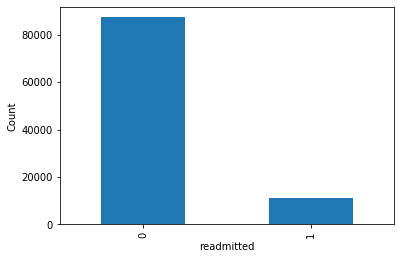

(98601, 95)


In [8]:
#df_age = pd.get_dummies(df['age'])
#df_race = pd.get_dummies(df['race'])
#df_gender = pd.get_dummies(df['gender'])
#df_change = pd.get_dummies(df['change'])
#df_diabetesMed = pd.get_dummies(df['diabetesMed'])

df_max_glu_serum = pd.get_dummies(df['max_glu_serum'])
df_A1Cresult = pd.get_dummies(df['A1Cresult'])
df_insulin = pd.get_dummies(df['insulin'])
df_discharge_disposition_id = pd.get_dummies(df['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(df['admission_source_id'])
df_admission_type_id = pd.get_dummies(df['admission_type_id'])

#print(df_max_glu_serum)
#df = pd.concat([df,df_max_glu_serum])
#df.drop(['max_glu_serum'], axis=1, inplace=True)             
df = pd.concat([df,df_max_glu_serum, df_A1Cresult, 
                df_insulin, df_discharge_disposition_id, 
                df_admission_source_id, df_admission_type_id], axis=1)
df.drop([ 'max_glu_serum', 'A1Cresult', 'insulin','discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)
#before
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

print(df.shape)
# df = df['readmitted' == 1 or 'readmitted' == 0]
#df.readmitted = np.where(df.readmitted=2, 0, df.readmitted)
#after
# df.groupby('readmitted').size().plot(kind='bar')
# plt.ylabel('Count')
# plt.title("AFTER CHANGE")
# plt.show()
# #print(df.iloc[0])
# #df.head()
# df.head()

In [9]:
from sklearn.model_selection import train_test_split

feature_col_names = df.columns
#print(df.columns)
x = df[feature_col_names]
#x = x.drop('readmitted', axis=1)
x = df.loc[:, df.columns != 'readmitted']
y = df['readmitted']
#print(x.columns, y)
#print(y.unique())
#print(x, y)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x.as_matrix(), y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Using TensorFlow backend.


Original dataset shape Counter({0: 87351, 1: 11250})


/Users/Mal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


New dataset shape Counter({0: 87351, 1: 87351})


neural networks

/Users/Mal/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


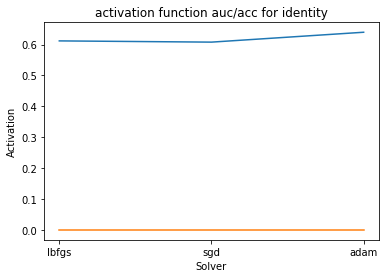

/Users/Mal/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


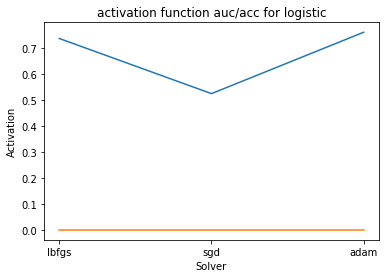

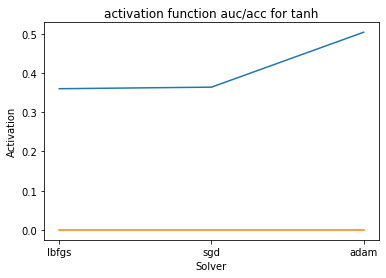

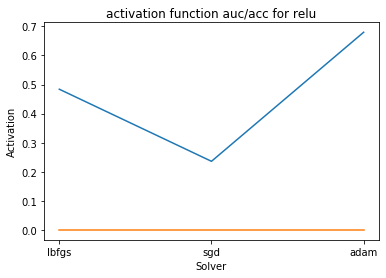

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
activation = ['identity', 'logistic', 'tanh', 'relu'] #defualt: relu
solver = ['lbfgs', 'sgd', 'adam'] #default : adam

va_auc = np.zeros((len(activation),len(solver)))
va_acc = np.zeros((len(activation),len(solver)))
for i, func in enumerate(activation):
    for j, c in enumerate(solver):
        clf = MLPClassifier()
        clf.fit(X_train[:250], Y_train[:250])
        preds = clf.predict(X_test[:250])
        fpr, tpr, thresholds = metrics.roc_curve(Y_test[:250], preds, pos_label=1)
        va_auc[i][j] = metrics.auc(fpr, tpr)
        va_auc[i][j] = accuracy_score(Y_test[:250], preds)
        
    plt.plot(va_auc[i], label='auc')
    plt.plot(va_acc[i], label='acc')
    plt.title("activation function auc/acc for " + func)
    plt.xticks([0, 1, 2], solver)
    plt.xlabel('Solver')
    plt.ylabel('Activation')
    plt.show()
        
        

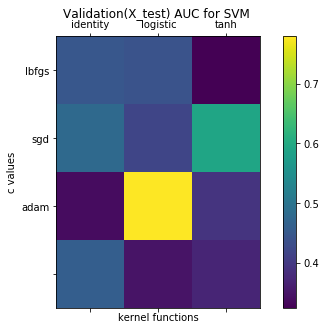

In [12]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+activation)
ax.set_yticklabels(['']+solver)
ax.set_title("Validation(X_test) AUC for SVM ")
ax.set_xlabel('kernel functions')
ax.set_ylabel('c values')
plt.show()

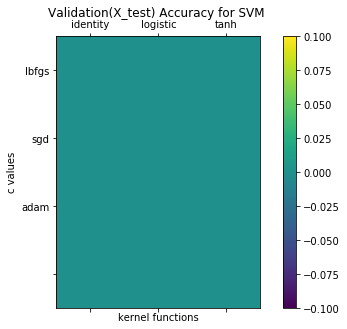

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_acc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+activation)
ax.set_yticklabels(['']+solver)
ax.set_title("Validation(X_test) Accuracy for SVM ")
ax.set_xlabel('kernel functions')
ax.set_ylabel('c values')
plt.show()

support vector machines

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import svm
from sklearn.decomposition import PCA
# may need to do dimensionality reduction for svm

# pca = PCA(n_components=3)
# fit = pca.fit(X_train)
# X_train = pca.fit_transform(X_train)
# print("Explained Variance %s ", fit.explained_variance_ratio_)
# print(fit.components_)
# print(X_train.shape)
#SVM DOES A LOT Better WITHOUT SMOTE
#left out 'precomputed' kernel func bc had to create pairwise matrix

#print(X_train[:250])
k_func = ['linear', 'poly', 'rbf', 'sigmoid']
c_range = [0.05, 0.01, 0.10, 0.5,1, 2.5, 5] #..should we go higher
#c_range = [0.05, 0.01, 0.10, 0.5,1]
#for func in k_func:
#for i in range(len(k_func)):
all_accs = []
all_acc_vals = []
for func in enumerate(k_func):
    acc_avg = 0
    accs = []
    aucs = []
    for c in enumerate(c_range):
        print("Going ... ", func, c)
        clf = svm.SVC(C=c[1], kernel=func[1])
        clf.fit(X_train[:250], Y_train[:250])
        preds = clf.predict(X_test[:250])
        cm =  confusion_matrix(Y_test[:250], preds)
        acc = accuracy_score(Y_test[:250], preds)
        acc_avg += acc
        fpr, tpr, thresholds = metrics.roc_curve(Y_test[:250], preds, pos_label=1)
        auc =  metrics.auc(fpr, tpr)
        print("AUC ", auc)  
        print("ACCURACY " , acc)
        print(cm)
        accs.append(acc)
        aucs.append(auc)
        print(func , acc)
        all_accs.append((acc, func, c))
        all_acc_vals.append(acc)
    plt.plot(accs, marker = '.')
    plt.plot(aucs, marker = '.')
    plt.plot()
    plt.xlabel("c values")
    plt.ylabel("accuracy ")
    plt.xticks([0, 1, 2, 3, 4] , c_range)
    plt.title('accuracy changing by c values for kernel func: ' + func)
    plt.show()

    acc_avg = acc_avg / len(c_range)
    print("FUNC AVG ", func,  acc_avg)
    
    
maximumACC = np.max(np.array(all_acc_vals))
print("MAX " ,maximumACC)
for stuff in all_accs:
    if stuff[2] == maximumACC:
        print("Best one - kernel/c: ", stuff[0], stuff[1])
        
    #fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds, pos_label=1)
    #va_auc[i][j] = metrics.auc(fpr, tpr)
    #va_acc[i][j]= accuracy_score(Y_test, preds)
    
 
#print(va_auc)
#print(va_acc)
    

In [ ]:
va_auc = np.zeros((len(k_func),len(c_range)))
va_acc = np.zeros((len(k_func),len(c_range)))
for i, func in enumerate(k_func):
    for j, c in enumerate(c_range):
        clf = svm.SVC(C=c, kernel=func)
        clf.fit(X_train[:250], Y_train[:250])
        preds = clf.predict(X_test[:250])
        fpr, tpr, thresholds = metrics.roc_curve(Y_test[:250], preds, pos_label=1)
        va_auc[i][j] = metrics.auc(fpr, tpr)
        va_auc[i][j] = accuracy_score(Y_test[:250], preds)


In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+k_func)
ax.set_yticklabels(['']+c_range)
ax.set_title("Validation(X_test) AUC for SVM ")
ax.set_xlabel('kernel functions')
ax.set_ylabel('c values')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_acc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+k_func)
ax.set_yticklabels(['']+c_range)
ax.set_title("Validation(X_test) Accuracy for SVM ")
ax.set_xlabel('kernel functions')
ax.set_ylabel('c values')
plt.show()

deep learning - neural networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
print(x)
for train, test in kfold.split(x[:250], y[:250]):
    print("Going....")
    model = Sequential()
    model.add(Dense(12, input_dim=94, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Fit the model
    model.fit(x[:250].values[train], y[:250].values[train], epochs=150, batch_size=10, verbose=0)
# evaluate the model
    scores = model.evaluate(x[:250].values[test], y[:250].values[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))